# <center>**TASK2 (PART-ll)**

# <center>**EXPLORATORY DATA ANALYSIS**</center>

### <center>**EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists.**

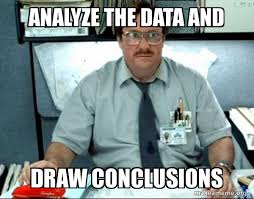 </center>

### **Steps involved in EDA**

###The steps mentioned below are helpful in performing EDA.You are suggested to do it if applicable in the dataset.

- Check the shape of the data frame.
- Check for null values.
- Convert the variables into appropriate data types if there is a mismatch.
- Check for the frequency of different classes in case of a categorical variable.
- Check for distribution of continuous variables

###Below is a checklist to guide you while performing EDA.

- What kind of data do you have?
- What’s missing from the data?
- Where are the outliers?
- How can you add, change or remove features to get more out of your data?
  - Feature Selection
  - Handling missing values
  - Handling skewed data
  - Handling outliers
  - Encoding
  - Feature Scaling

Finally we have the most important question, 
"What question are you trying to solve ?"  
You need to think about questions you can ask of a dataset.  
Questions can be simple as "What is the number of survivors?" or 
"Which gender had a better chance of survival?"  
You goal is to formulate your questions and making inferences.


### **Resources**
Watching:

- [EDA using Python](https://www.youtube.com/watch?v=-o3AxdVcUtQ)
- [Feature Selection-How To Drop Features Using Pearson Correlation](https://www.youtube.com/watch?v=FndwYNcVe0U&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=2)


Reading:

- [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)
- [Handling Skewness in Machine Learning](https://beingdatum.com/handling-skewness-in-machine-learning/)
- [Transforming Skewed Data for Machine Learning](https://opendatascience.com/transforming-skewed-data-for-machine-learning/)
- [5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
- [Box Plot Diagram to Identify Outliers](https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/)
- [Convert a categorical variable to a number for Machine Learning Model Building](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)


In [70]:
# run this cell before proceeding further
!wget https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv

--2021-07-11 17:33:43--  https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv.2’

titanic.csv.2       100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2021-07-11 17:33:43 (45.0 MB/s) - ‘titanic.csv.2’ saved [61194/61194]



*Make sure to run the above cell before loading the data*

Use the 'titanic.csv' dataset for the questions in this section.

#### **Using the concepts learnt till now perform EDA on the titanic datset**.

#### The goal of this analysis is to analyse the data set, explore it answering related questions using data visualization and statistical methods.
**With Titanic dataset analysis draw minimum 5 conclusions from  and also answer the following questions .**

1)What is the overall passengers survival ratio?

2)Which groups have higher chances for survival?


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/titanic.csv")

 first five rows of this data

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Number of columns and rows in the titanic dataset


In [73]:
df.shape

(891, 12)

How many null values are present in different columns in our data set?
Which column have null values more than 35% ?

In [74]:
x=df.isnull().sum()
print(x)
print('\n')
print(type(x))  # x is a pandas series
print('\n')
drop_col=x[x>(35/100)*df.shape[0]]
print(drop_col.index)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<class 'pandas.core.series.Series'>


Index(['Cabin'], dtype='object')


Since Cabin column has more than 35% null values so we can drop this column from our data.

In [75]:
df.drop(drop_col.index,axis=1,inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


Age column still having null values so we can fill all the null values with the mean of age.

In [76]:
df.fillna(df.mean(),inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


the null values of the Embarked is still 2 because the values stored in the Embarked column is of type string so we can't calculate the mean of strings.Now we will see the features of the Embarked column by using describe()

In [77]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Now we will change the null values of Embarked column from 'S' because above we saw that S has a frequency of 646 it means that most of the values of the Embarked column is S

In [78]:
df['Embarked'].fillna('S',inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we will see the corelation between different columns ,A larger magnitude means that there is a good relation between that two columns.

In [79]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


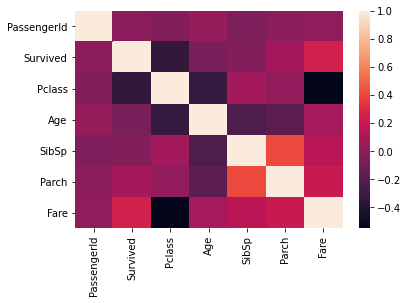

In [80]:
sns.heatmap(df.corr())
plt.show()

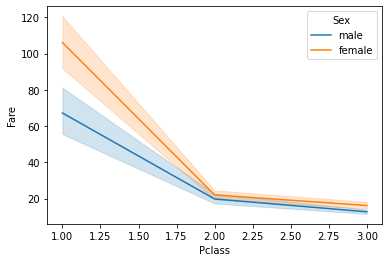

In [81]:
sns.lineplot(x="Pclass",y="Fare",data=df,hue="Sex")

In the above we can see that there is a good relation between fare and the Pclass colums and it is obvious that larger fare means good Pclass

If We add the two colums(SibSp and Parch) then we will get the family size so we want to add a column containing the sum.

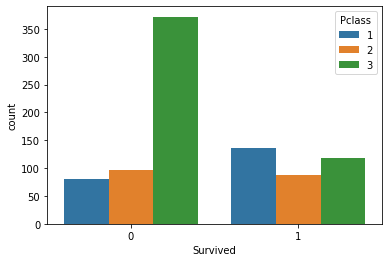

In [98]:
sns.countplot(data=df,x="Survived",hue="Pclass")

Those who belong to class 1 has a greater chance of survival.

In [82]:
df['FamilySize']=df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


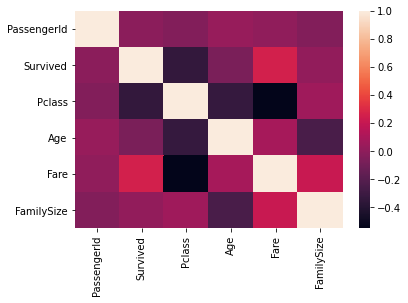

In [83]:
sns.heatmap(df.corr())
plt.show()

Above we can see that there is no corelation between the familysize and the number of survivors it means that if your familysize is big,it doesn't mean that there are more survivors from that family.But here there is a negative corelation between the survivors and the Pclass ,it means that those having 1 class has the more survivors.

Now we want to add a column which tells that whether the person is alone or not.

In [84]:

df['Alone']=[0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1



We want to know the realtion between person who is alone or not and the survivors.

In [85]:

df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


The above reuslt concludes that the people who are alone are the less survivors.

In [86]:

df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000



This negative corelation says that those who have a familyy has a larger fare and those who are alone has a lesser fare.

Now we will see the chances of suriving according to gender.

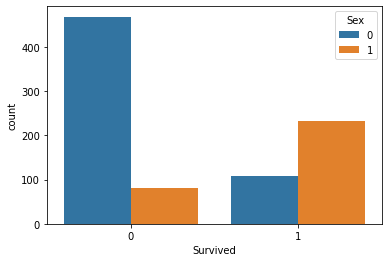

In [96]:

sns.countplot(data=df,x='Survived',hue="Sex")

In [88]:
df['Sex']=[0 if df['Sex'][i]=='male' else 1 for i in df.index]# 1 for female and 0 for male
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Here we notice that female has a greater chance of surivival.

In [89]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [101]:
#df["Child"]=float('NaN')
df["Child"][df["Age"]<18]=1
df["Child"][df["Age"]>=18]=0
df.groupby(['Child'])['Survived'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Child
0.0    0.361183
1.0    0.539823
Name: Survived, dtype: float64

In [104]:
survived_data = df[df['Survived'] == 1]
survived = survived_data.count().values[1]
survival_percent = (survived/891) * 100
print(survival_percent)

38.38383838383838


CONCLUSIONS

1.Female passengers were prioritized over man.

2.People with high class or rich people have higher survival rate than others. The hierarichy might have been followed while saving the passangers.


3.Passengers travelling with their family have higher survival rate.

4.Passengers who borded the ship at Cherbourg,survived more in proportion than the others.

5.people who are under 18(child), they were more likely to survive than people that above age 18.

ANS 1: The survival ratio or percent is 38.38383838383838 %
ANS 2: if considering age then the group having age less than 18 has greater chance of survival.
If we consider Pclass then class 1 has more survivors and if we consider sex then female have greater surivals.